# MEE4006 CFD Lab
# Exercise 0 - Explicit

# This code solves the 1D heat conduction equation with fixed temperatures at both ends (Dritchlet type), without sources

## Governing equation
$\frac{\partial T}{\partial t} = \alpha  \frac{\partial^2 T}{\partial x^2} $

## Domain and material
$x \in [0,1]$

$\alpha = 1.0 m^2/s $


## Boundary conditions
At $x=0, T_0 = 373 K$ 



At $x=1, T_1 = 303 K$

## Grid 

Find the optimal number of points needed to obtain grid converged solution.

## Numerical method - explicit scheme

We implement the spacing marching method in space, using second-order central difference.

$\frac{\partial T}{\partial t} = \frac{T^{n+1}_i-T^n_i}{\Delta t}$


$ \alpha \frac{\partial^2 T}{\partial x^2} = \alpha \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2}$

Since, 

$ \frac{T^{n+1}_i-T^n_i}{\Delta t} = \alpha \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2} $

$T^{n+1}_i = T_i + \alpha \Delta t \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2}$


## Error

We find the L2-norm of the error i.e., the rate at which the solution changes

$ L_2 Norm = \sqrt{ \Sigma x_i^2 } $


# Exercise
## 1. Generate the line plot, and the contour plot, for T_left=150K, T_right = 500K
## 2. Comment on the effect of grid size on the rate of convergence
## 3. What happens if the $\Delta t$ is multiplied by (i) 0.5, (ii) >0.5 ? And why ?

In [67]:
import numpy as np # math library
import matplotlib.pyplot as plt # library for plotting
np.set_printoptions(precision=10) # sets the prcision for numbers - while printing

In [68]:
# Define parameters
N = 26
max_iter = 12000

time = 1.0
alpha = 1
T_left = 373.0
T_right = 303.0
T_guess = 300.0

In [69]:
# create grid from [0,N-1]
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(0.0, 1.0, N, endpoint=True, dtype=np.float64) 
dx = x[1]-x[0]
dt = 0.5*(dx**2)/alpha # See eqn 4.77 from John D Anderson
print('dx,dt = ',dx, dt)
x

dx,dt =  0.04 0.0008


array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  ])

In [70]:
# find max iterations based on total runtime and dt
max_iter = int(time/dt)+10 # we need a bit more number of iterations to get to the exact time 
error = np.zeros(max_iter,dtype=np.float64)
max_iter # expected number of iterations

1260

In [71]:
# Create the data arrays
T = np.linspace(T_guess, T_guess, N, dtype=np.float64)
T_old = np.linspace(T_guess, T_guess, N, dtype=np.float64 )

In [72]:
T

array([300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300.])

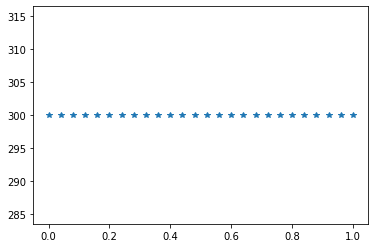

In [73]:
# plot initial condition
plt.plot(x,T,'*')

In [74]:
ts=0.0 # store simulation time
dt_temp=dt # we will need to change dt as the simulation time reaches time

for i in range(0,max_iter):
    
    T_old = T.copy() # copy one array to another
    
    # set BCs
    T_old[0] = T_left
    T_old[N-1] = T_right

    # apply the difference formula
    for j in range(1,N-1): # note excludes N-1
        T[j] = T_old[j] + (alpha*dt_temp/dx**2)*( T_old[j+1] - 2*T_old[j] + T_old[j-1] )
    
    # set BCs        
    T[0] = T_left
    T[N-1]=T_right
    
    # update time of the simulation
    ts = ts+dt_temp  
    
    # compute error
    # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
    # https://numpy.org/doc/stable/reference/generated/numpy.subtract.html
    error[i]=np.linalg.norm(np.subtract(T,T_old),2)     

    print('Iteration = ',i,'Time = ', ts, 'dt = ',dt_temp)
    if(ts==time):
        print('Reached time', ts)
        break
    
    # change 'dt' when simulation time (ts) is close to time (time)
    if( (ts+dt_temp) >= time):
        dt_temp = time-ts
        print('Changed dt = ',dt_temp)
            

Iteration =  0 Time =  0.0008 dt =  0.0008
Iteration =  1 Time =  0.0016 dt =  0.0008
Iteration =  2 Time =  0.0024000000000000002 dt =  0.0008
Iteration =  3 Time =  0.0032 dt =  0.0008
Iteration =  4 Time =  0.004 dt =  0.0008
Iteration =  5 Time =  0.0048000000000000004 dt =  0.0008
Iteration =  6 Time =  0.005600000000000001 dt =  0.0008
Iteration =  7 Time =  0.006400000000000001 dt =  0.0008
Iteration =  8 Time =  0.0072000000000000015 dt =  0.0008
Iteration =  9 Time =  0.008000000000000002 dt =  0.0008
Iteration =  10 Time =  0.008800000000000002 dt =  0.0008
Iteration =  11 Time =  0.009600000000000003 dt =  0.0008
Iteration =  12 Time =  0.010400000000000003 dt =  0.0008
Iteration =  13 Time =  0.011200000000000003 dt =  0.0008
Iteration =  14 Time =  0.012000000000000004 dt =  0.0008
Iteration =  15 Time =  0.012800000000000004 dt =  0.0008
Iteration =  16 Time =  0.013600000000000004 dt =  0.0008
Iteration =  17 Time =  0.014400000000000005 dt =  0.0008
Iteration =  18 Time

Iteration =  423 Time =  0.3392000000000015 dt =  0.0008
Iteration =  424 Time =  0.3400000000000015 dt =  0.0008
Iteration =  425 Time =  0.34080000000000155 dt =  0.0008
Iteration =  426 Time =  0.34160000000000157 dt =  0.0008
Iteration =  427 Time =  0.3424000000000016 dt =  0.0008
Iteration =  428 Time =  0.3432000000000016 dt =  0.0008
Iteration =  429 Time =  0.34400000000000164 dt =  0.0008
Iteration =  430 Time =  0.34480000000000166 dt =  0.0008
Iteration =  431 Time =  0.3456000000000017 dt =  0.0008
Iteration =  432 Time =  0.3464000000000017 dt =  0.0008
Iteration =  433 Time =  0.34720000000000173 dt =  0.0008
Iteration =  434 Time =  0.34800000000000175 dt =  0.0008
Iteration =  435 Time =  0.3488000000000018 dt =  0.0008
Iteration =  436 Time =  0.3496000000000018 dt =  0.0008
Iteration =  437 Time =  0.3504000000000018 dt =  0.0008
Iteration =  438 Time =  0.35120000000000184 dt =  0.0008
Iteration =  439 Time =  0.35200000000000187 dt =  0.0008
Iteration =  440 Time =

Iteration =  853 Time =  0.6832000000000114 dt =  0.0008
Iteration =  854 Time =  0.6840000000000114 dt =  0.0008
Iteration =  855 Time =  0.6848000000000114 dt =  0.0008
Iteration =  856 Time =  0.6856000000000114 dt =  0.0008
Iteration =  857 Time =  0.6864000000000114 dt =  0.0008
Iteration =  858 Time =  0.6872000000000115 dt =  0.0008
Iteration =  859 Time =  0.6880000000000115 dt =  0.0008
Iteration =  860 Time =  0.6888000000000115 dt =  0.0008
Iteration =  861 Time =  0.6896000000000115 dt =  0.0008
Iteration =  862 Time =  0.6904000000000116 dt =  0.0008
Iteration =  863 Time =  0.6912000000000116 dt =  0.0008
Iteration =  864 Time =  0.6920000000000116 dt =  0.0008
Iteration =  865 Time =  0.6928000000000116 dt =  0.0008
Iteration =  866 Time =  0.6936000000000117 dt =  0.0008
Iteration =  867 Time =  0.6944000000000117 dt =  0.0008
Iteration =  868 Time =  0.6952000000000117 dt =  0.0008
Iteration =  869 Time =  0.6960000000000117 dt =  0.0008
Iteration =  870 Time =  0.6968

In [75]:
ts, dt, time, dt_temp

(1.0, 0.0008, 1.0, 0.0007999999999795948)

In [76]:
T

array([373.          , 370.1996937157, 367.3993966769, 364.599100392 ,
       361.7988312627, 358.9985635939, 356.1983392847, 353.3981170506,
       350.5979516554, 347.7977888199, 344.9976927312, 342.1975995258,
       339.3975787812, 336.5975610623, 333.7976169653, 330.9976758462,
       328.1978048842, 325.3979366652, 322.5981307303, 319.7983271312,
       316.9985740295, 314.1988227097, 311.3991069276, 308.5993922616,
       305.7996959408, 303.          ])

In [77]:
T_old

array([373.          , 370.1996935242, 367.3993874313, 364.5990998295,
       361.7988133526, 358.9985626959, 356.1983138353, 353.3981158734,
       350.5979202659, 347.7977874375, 344.9976573739, 342.197598025 ,
       339.3975416777, 336.5975595375, 333.7975804469, 330.9976743931,
       328.1977712455, 325.3979353753, 322.598102085 , 319.7983260853,
       316.9985521774, 314.1988219736, 311.3990932419, 308.5993918817,
       305.7996912813, 303.          ])

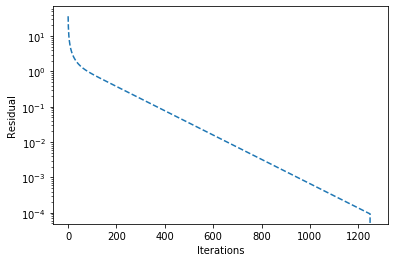

In [78]:
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html
plt.xlabel('Iterations')
plt.ylabel('Residual')
plt.yscale('log') # set log scale in y
plt.plot(np.arange(max_iter),error,'--')
plt.show()

In [79]:
# Lets computet he anlytical solution
T_analytical = (T_right-T_left)*x+T_left


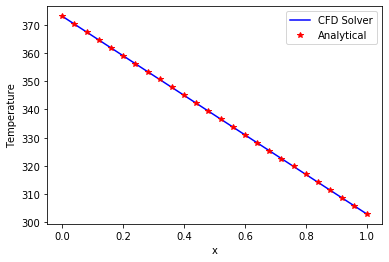

In [80]:
# plot final condition
# https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.xlabel('x')
plt.ylabel('Temperature')
plt.plot(x,T,'b-',label='CFD Solver')
plt.plot(x, T_analytical,'r*',label='Analytical')
plt.legend() 
plt.show()


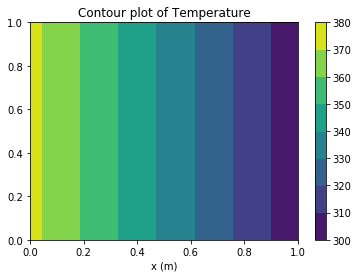

In [81]:
# contour plot
#############################
X, Y = np.meshgrid(x,x ) # create a dummy 2D grid 
# https://numpy.org/doc/stable/reference/generated/numpy.tile.html
# copy the 1D data to a 2D array
T2D = np.tile(T,(N,1))

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T2D)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour plot of Temperature')
ax.set_xlabel('x (m)')
plt.show()